# 텍스트 데이터 전처리

```
pip install konlpy
pip install kiwipiepy
```

## 데이터 불러오기

In [1]:
import pandas as pd

df1 = pd.read_csv('./data/lee_all.csv', sep=',', quoting=1)
df1['label'] = '이재명'
df2 = pd.read_csv('./data/yoon_all.csv', sep=',', quoting=1)
df2['label'] = '윤석열'
df = pd.concat([df1, df2], axis=0).reset_index(drop=True)

In [2]:
len(df)

21660

In [3]:
df.sample()

,url,press,title,datetime,text,label
18003,http://www.sisafocus.co.kr/news/articleView.ht...,시사포커스,[포토] 젊은 문화예술인들 '윤석열 탄핵 반대' 집회 참가,2025-03-01 11:06:25+09:00,2월 28일 오후 교보빌딩 앞 윤석열 대통령 탄핵반대 문화예술인 광화문 버스킹 전야...,윤석열


## 중복 뉴스 확인

In [4]:
df_dup = df[df.duplicated(subset=['url'], keep=False)]
df_dup_sorted = df_dup.sort_values(by='url')
print(len(df_dup_sorted))
df_dup_sorted

4964


,url,press,title,datetime,text,label
16209,http://andongmbc.co.kr/adboard/NewsView74142,안동MBC,내일 안동에서 윤석열 파면 촉구 11차 문화제,NaN,\n\n윤석열 대통령의 파면을 촉구하는\n\n안동 시민 문화제가 이번 주말도 열립니...,윤석열
16242,http://andongmbc.co.kr/adboard/NewsView74142,안동MBC,내일 안동에서 윤석열 파면 촉구 11차 문화제,NaN,\n\n윤석열 대통령의 파면을 촉구하는\n\n안동 시민 문화제가 이번 주말도 열립니...,윤석열
1245,http://kor.theasian.asia/archives/371720,아시아엔,"'아사히신문' 김형오 전 국회의장 인터뷰 ""한국정치 혼란의 본질은 무엇...",NaN,NaN,이재명
1302,http://kor.theasian.asia/archives/371720,아시아엔,"'아사히신문' 김형오 전 국회의장 인터뷰 ""한국정치 혼란의 본질은 무엇...",NaN,NaN,이재명
17687,http://kor.theasian.asia/archives/373408,아시아엔,"[전문] 윤석열 대통령 헌재 최종 진술 ""잔여 임기 연연 않겠다""",2025-02-26 00:07:09+00:00,6차 변론 당시 윤석열 대통령\n\n\n\n윤석열 대통령은 25일 헌법재판소 탄핵 ...,윤석열
...,...,...,...,...,...,...
18842,https://www.ytn.co.kr/_ln/0104_202503081801563826,YTN,"[속보] 주요 해외언론, 윤석열 대통령 석방 긴급 타전",2025-03-08 18:01:00+09:00,"AD\n\n주요 해외언론, 윤석열 대통령 석방 긴급 타전\n\n\n\n◇ 자세한 뉴...",윤석열
20803,https://www.ytn.co.kr/_ln/0134_202503242037550950,YTN,각하 가능성 줄었다?...한덕수로 본 윤석열 탄핵 선고 [Y녹취록],2025-03-24 20:37:00+09:00,"AD\n\n■ 진행 : 이여진 앵커, 정원석 앵커\n\n■ 출연 : 이고은 변호사\...",윤석열
20756,https://www.ytn.co.kr/_ln/0134_202503242037550950,YTN,각하 가능성 줄었다?...한덕수로 본 윤석열 탄핵 선고 [Y녹취록],2025-03-24 20:37:00+09:00,"AD\n\n■ 진행 : 이여진 앵커, 정원석 앵커\n\n■ 출연 : 이고은 변호사\...",윤석열
15084,https://www.ziksir.com/news/articleView.html?i...,직썰,"민주당 ""윤석열의 거짓말, 여인형-홍장원 증언으로 드러나""",2025-02-05 11:05:54+09:00,더불어민주당 조승래 수석대변인. [연합뉴스]\n\n[직썰 / 김봉연 기자] 더불어민...,윤석열


In [5]:
df_dup_sorted.label.value_counts()

label
윤석열    2877
이재명    2087
Name: count, dtype: int64

## 중복 뉴스 제거

In [6]:
df = df.drop_duplicates('url', keep='first')
len(df)

19054

## 내용 없는 뉴스 확인

In [7]:
df_null = df[df.text.isna()]
df_null.head()

,url,press,title,datetime,text,label
1,https://news.jtbc.co.kr/article/NB12230072?inf...,JTBC,"이재명 35%, 홍준표 8%…범진보 44%, 범보수 33%",NaN,NaN,이재명
3,https://www.chosun.com/politics/politics_gener...,조선일보,"차기 대선후보 조사서 이재명 1위... ‘민주-국힘 격차, 오차범위 내’...",2025-01-01 00:00:00,NaN,이재명
90,https://biz.chosun.com/policy/politics/2025/01...,조선비즈,李 “지난해 유례없는 어둠 직면… 새로운 미래 열겠다”,2025-01-01 00:00:00,NaN,이재명
123,https://www.chosun.com/national/court_law/2025...,조선일보,이재명 ‘선거법 위반’ 항소심 23일 시작... 1심 선고 후 두달 만,2025-01-02 00:00:00,NaN,이재명
135,https://www.chosun.com/opinion/column/2025/01/...,조선일보,"[양상훈 칼럼] 이재명 막겠다는 국힘, 다 빗나가는 이유",2025-01-02 00:00:00,NaN,이재명


In [8]:
df_null_press = df_null.press.value_counts().to_frame()
df_press = df.press.value_counts().to_frame()
df_press_count = pd.merge(df_null_press, df_press, left_index=True, right_index=True, how='left')
df_press_count.columns = ['null_data_count', 'all_data_count']
df_press_count

,null_data_count,all_data_count
press,,
JTBC,179,179
조선일보,172,172
뉴스1,94,1151
민중의소리,74,74
이데일리,73,382
조선비즈,71,71
스카이데일리,25,25
TV조선,21,354
SBS Biz,12,12


In [9]:
df = df.dropna(subset='text')
len(df)

18303

## 레이블별 뉴스수 카운트

In [10]:
df.groupby(['label']).size()

label
윤석열    8938
이재명    9365
dtype: int64

## 언론사별 뉴스수 카운트

In [11]:
df.groupby(['press']).size().sort_values(ascending=False).to_frame()

,0
press,
뉴시스,1734
한겨레,1057
뉴스1,1057
연합뉴스,1033
오마이뉴스,797
...,...
제주매일,1
스포츠월드,1
전북중앙,1


## 뉴스 텍스트 길이

In [12]:
df['len'] = df['text'].apply(lambda x: len(x))

In [13]:
df.sample()

,url,press,title,datetime,text,label,len
17770,https://ilyo.co.kr/?ac=article_view&entry_id=4...,일요신문,'분위기 반전' 없었다…윤석열 '최후변론'이 탄핵심판에 미칠 영향,2025-02-27 11:06:00+09:00,윤석열 대통령은 2월 25일 탄핵 심판 최종 변론 기일 최후변론에서 계엄의 정당성을...,윤석열,2597


## 뉴스 길이 시각화

<Axes: >

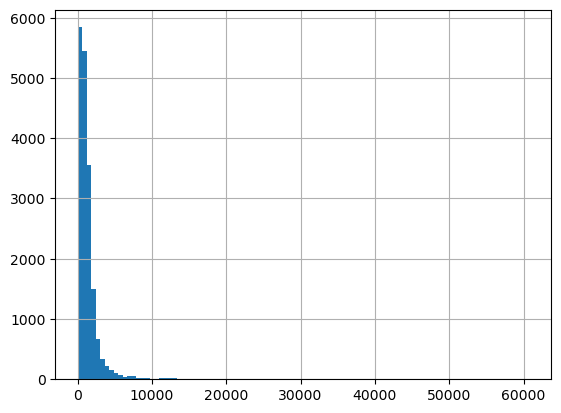

In [14]:
df['len'].hist(bins=100)

In [15]:
df[df['len'] > 60000].text.values[0]

'[폴리뉴스 대담 김능구 발행인, 정리 서경선 기자] 김능구 폴리뉴스 대표와 홍형식 한길리서치 소장은 12일 서울 여의도 폴리뉴스 폴리TV 스튜디오에서 가진 <민심레이더>에서 윤석열 대통령 석방 전후에 실시된 최근 여론조사에서 나타난 민심 흐름과 국민의힘의 행보를 진단·전망하는 대담을 가졌다.\n\n“尹 석방, 국민은 잘못된 결정이라고 보지만 국힘 지지층에선 尹 영향력 더 커져”\n\n▲ 김능구> 윤석열 대통령 석방으로 향후 조기 대선은 윤석열 대 이재명, 이재명 대 윤석열의 대선 2라운드 아니겠느냐, 이런 겁니다. 한길리서치 홍형식 소장님의 민심 리포트부터 들어보도록 하겠습니다.\n\n△ 홍형식> 저희들이 오늘 발표하는 여론조사를 간단하게 말씀을 드릴게요. 조사 개요는 3월 8~10일까지 3일간 조사를 했고 1,022명 유·무선 조사로 진행된 겁니다. 자세한 내용은 한길리서치 홈페이지나 중앙선거여론조사심의위원회 홈페이지를 참고하시기 바랍니다. 주요 지표만 먼저 말씀드릴게요.\n\n정당 지지율을 물어봤더니만 민주당이 39.2%, 국힘이 38.5%입니다. 민주당이 0.7%p 높습니다. 여기서 수치를 잘 읽어야 돼요. 지난 총선에서 정당 지지율을 오독했죠. 정당 지지율을 잘못 읽어서 총선 전망도 잘못했죠. 그게 무슨 이야기냐면 지난 총선 때 보면 민주당과 국민의힘이 비슷했어요. 어떨 땐 국힘당이 앞서기도 했어요. 그래서 국힘당이 앞선다고 전망했는데 문제는 조국혁신당, 새로운미래 등 야 성향의 정당 지지율이 그 당시에도 합하면 한 10%p가 됐습니다. 그걸 빼고 전망한 거죠. 그쪽의 후보들이 나오지를 않는데 당연히 그 지지율은 민주당 지역구 출마하는 후보들을 지지하게 되어 있는데 그걸 더하면 민주당이 한 10% 가까이 앞섰어요. 그런데 그걸 빼고는 백중 또는 때에 따라서는 국힘당이 앞선다고 해석을 해서 전망도 틀렸고, 내가 볼 때는 지금 여당 보수 진영이라고 부정선거의 어떻게 보면 하나의 근거가 되는 것도 그 부분이야. 비슷한 정당 지지율에 대고 왜 민주당한테 완패

### 텍스트 길이가 100 이하인 뉴스 제거

In [16]:
df = df[df['len'] > 100]
len(df)

16890

### 관련없는 뉴스 제거

In [17]:
df_not_relevant = df[~df.text.str.contains('윤석열') & ~df.text.str.contains('이재명')]
len(df_not_relevant)

1228

In [19]:
df_not_relevant.head()

,url,press,title,datetime,text,label,len
16,https://www.ichannela.com/news/main/news_detai...,채널A,이재명과 양자대결서 오세훈·홍준표 각각 20%대,2025-01-01 19:20:00+00:00,법적고지\n\n채널A에서 제공하는 콘텐츠에 대하여\n\n\n\n채널A의 각종 서비스...,이재명,873
20,https://www.newsis.com/view/NISX20250101_00030...,뉴시스,"박찬대, 현충원 참배 ""내란극복·민생안정""…이재명은 무안 방문",2025-01-01 10:28:39+09:00,[서울=뉴시스] 김명년 기자 = 박찬대 더불어민주당 원내대표와 지도부가 새해 첫날인...,이재명,111
52,https://www.donga.com/news/Politics/article/al...,동아일보,"진보진영 대선후보 이재명 39.4% 선두, 김동연 8.5%-우원식 5.7%… 보수진...",2025-01-01 13:00:00,[신년 여론조사]\n\n진보-보수 차기 대통령감 적합도\n\n크게보기 동아일보가 여...,이재명,1034
61,https://www.newsis.com/view/NISX20250101_00030...,뉴시스,"여야 지도부, 새해 첫 일정으로 현충원 참배…무안도 방문",2025-01-01 12:48:23+09:00,[서울=뉴시스] 김명년 기자 = 권영세(왼쪽부터) 국민의힘 비상대책위원장과 우원식 ...,이재명,145
69,https://www.ichannela.com/news/main/news_detai...,채널A,"이재명, 공직선거법 2심 변호인 교체…“재판 지연 의도 없다”",2025-01-01 18:08:00+00:00,법적고지\n\n채널A에서 제공하는 콘텐츠에 대하여\n\n\n\n채널A의 각종 서비스...,이재명,873


In [21]:
df.loc[16].text

'법적고지\n\n채널A에서 제공하는 콘텐츠에 대하여\n\n\n\n채널A의 각종 서비스를 사용하여 인터넷에 올려진 정보를 얻고자 하실 때에는 다음과 같은 점에 유의하시기 바랍니다.\n\n채널A가 제공하는 모든 제반 서비스를 이용하여 연결(링크)된 사이트에 수록되어 있는 정보 중에는 회원의 개인적인 판단에 따라 불쾌감 또는 피해를 주는 내용이 있을 수도 있습니다.\n\n채널A의 각 사이트 및 동호회 서비스 등에서 채널A 사이트 외부로의 링크 결과 열람하시는 사이트에서 현행 국내법상 불법이거나, 사회의 일반통념, 질서 및 미풍양속 등에 어긋나는 내용을 사전에 차단 하는 것과 관련하여 채널A는 어떠한 책임도 지지 않습니다.\n\n\n\n채널A는 네트워크에 링크된 모든 사이트에 수록된 자료의 정확성이나 상표법, 저작권법 등의 관계 법령의 준수 여부에 대하여 어떤 책임도 부인합니다.\n\n회원님들께서는 채널A와 네트워크로 연결되어 있는 웹사이트 또는 제3자에 의하여 채널A네트워크 상에서 작동되거나 제공되는 모든 정보, 상품들은 채널A의 통제 권한 밖에서 제작, 게시 및 작동되었음을 유념하시기 바랍니다.\n\n회원들이 복제 인용 등의 방법으로 채널A 사이트 안에 다른 사이트의 콘텐츠를 제공하였을 경우, 콘텐츠의 내용은 제3자에 의하여 개발되었고 회원에 의해 게시되었므로 채널A의 책임 여부와는 무관함을 명심하시기 바랍니다.\n\n\n\n물론 채널A가 스스로 제공하는 콘텐츠에 관하여는 위에 열거된 법령과 혹시 누락된 법령일지라도 관련 법령을 준수하기 위하여 최선을 다하고 있습니다.\n\n채널A의 서비스에 관하여 일반적 혹은 관계 법령의 준수에 관한 조언을 하고자 하실 때에는 언제나 홈페이지에 게시된 담당자에게 연락주시기 바랍니다.\n\n\n\n채널A는 여러분의 의견을 적극 수용하도록 최선을 다하겠습니다.'

In [22]:
df = df[df.text.str.contains('윤석열') | df.text.str.contains('이재명')]
len(df)

15662

## 날짜별 뉴스 개수

In [23]:
df['date'] = df['datetime'].str[:10]

In [24]:
df[['date']].groupby('date').size()

date
2024-12-31      3
2025-01-01    126
2025-01-02    128
2025-01-03    130
2025-01-04    136
             ... 
2025-03-28    156
2025-03-29    132
2025-03-30    139
2025-03-31    131
2025-04-02      3
Length: 92, dtype: int64

In [25]:
df[df['date'].str[5:7] == '04']

,url,press,title,datetime,text,label,len,date
206,https://www.ytn.co.kr/replay/view.php?idx=16&k...,YTN,"[돌발영상] ""국회의원들 정말 못됐어요"" 이재명에 울분 쏟아내는 유족",2025-04-02 11:49:41+09:00,"[돌발영상] ""국회의원들 정말 못됐어요"" 이재명에 울분 쏟아내는 유족 New 돌발영...",이재명,377,2025-04-02
3229,https://kizmom.hankyung.com/news/view.html?aid...,키즈맘,"차기 대선주자 적합도, 이재명 42%·김문수 28%...홍준표 7%·한동훈7%",2025-04-02 12:45:07+09:00,24일 시민들과 설 귀성 인사 나누는 이재명 대표 / 연합뉴스\n\n차기 대선주자 ...,이재명,711,2025-04-02
4170,https://kizmom.hankyung.com/news/view.html?aid...,키즈맘,"권성동, 이재명에 ""기만적인 역할극은 금투세로 충분""",2025-04-02 13:02:21+09:00,반도체특별법 주52시간제 특례 도입을 위한 당정 협의 / 연합뉴스\n\n국민의힘이 ...,이재명,800,2025-04-02


# `konlpy` 활용하기

```
pip install konlpy
```

* documentation: https://konlpy.org/en/latest/

In [28]:
df.iloc[-1]

url         https://news.tf.co.kr/read/photomovie/2192706.htm
press                                                     더팩트
title            이재명 "윤석열 복귀작전 진행 중… 유혈 사태 감당할 수 있겠나" [TF사...
datetime                            2025-03-31 12:20:56+09:00
text        이재명 "윤석열 복귀작전 진행 중… 유혈 사태 감당할 수 있겠나" [TF사진관]\n...
label                                                     윤석열
len                                                       877
date                                               2025-03-31
Name: 21658, dtype: object

In [29]:
from konlpy.tag import Hannanum
from konlpy.tag import Kkma
from konlpy.tag import Okt

han = Hannanum()
kkm = Kkma()
okt = Okt()

In [30]:
txt = df.iloc[-1].text
txt

'이재명 "윤석열 복귀작전 진행 중… 유혈 사태 감당할 수 있겠나" [TF사진관]\n\n이재명 더불어민주당 대표(가운데)와 최고위원들이 31일 오전 서울 광화문 앞 더불어민주당 천막당사에서 열린 최고위원회의에 참석해 윤석열 파면을 촉구하고 있다. /임영무 기자\n\n\n\n\n\n[더팩트ㅣ임영무 기자] 이재명 더불어민주당 대표(가운데)와 최고위원들이 31일 오전 서울 광화문 앞 더불어민주당 천막당사에서 열린 최고위원회의에 참석해 윤석열 파면을 촉구하며 발언을 하고 있다.\n\n이재명 더불어민주당 대표는 한덕수 대통령 권한대행 겸 국무총리가 마은혁 헌법재판관 후보자를 임명하지 않는 것을 두고 "윤석열 복귀 프로젝트가 진행 중이라는 주장에 공감하는 바가 많다"며 "윤석열이 복귀하면 엄청난 유혈 사태를 어떻게 감당할 수 있겠느냐"고 밝혔다.\n\n이어 "국회가 지명한 헌법재판관을 골라서 마음에 드는 사람은 임명하고 마음에 안 드는 사람은 임명 안 하는 것은 결국 국회의 헌법구성 권한을 침해한 것"이라며 "명백하게 정면으로 헌법을 위반한 것"이라고 덧붙였다.\n\n이 대표는 "심지어 헌법재판소가 임명하지 않는 것은 위헌이라고 판결했는데도 최상목이 어겼고 지금 한덕수 대행도 어기고 있다"며 "헌법에 도전하는 것을 넘어 헌법을 위반하고 헌정질서를 통째로 파괴하고 대한민국, 국민을 불안하게 만들고 있다. 지금 혼란은 모두 최 전 대행과 한 대행으로부터 시작된 것"이라고 목소리를 높였다.\n\n또한 "헌법재판관을 임명하지 않는 것이 위헌이다. 그에 따라 처분의 의무가 있다고 하면 헌법기관이 불이행하고 있을 때 당연히 그 보안 권한을 행사해야 하지 않느냐"며 헌재의 신속한 파면 선고를 거듭 촉구했다.\n\n\n\n\n\n\n\ndarkroom@tf.co.kr\n\n\n\n사진영상기획부 photo@tf.co.kr'

## 명사 추출해보기

In [31]:
' / '.join(kkm.nouns(txt))

'이재명 / 윤 / 열 / 복귀 / 복귀작전 / 작전 / 진행 / 중 / 유혈 / 사태 / 감당 / 수 / 사진관 / 민주당 / 대표 / 가운데 / 최고 / 최고위원 / 위원 / 31 / 31일 / 일 / 오전 / 서울 / 광화문 / 앞 / 천막 / 천막당사 / 당사 / 열린 / 최고위원회의 / 회의 / 참석 / 파면 / 촉구 / 임 / 임영무 / 영 / 무 / 기자 / 팩 / 팩트ㅣ임영 / 트ㅣ / 발언 / 한덕수 / 대통령 / 권한 / 권한대행 / 대행 / 겸 / 국무 / 국무총리 / 총리 / 마 / 마은혁 / 은 / 혁 / 헌법 / 헌법재판관 / 재판관 / 후보자 / 임명 / 프로젝트 / 중이 / 주장 / 공감 / 바 / 고 / 국회 / 지명 / 마음 / 사람 / 결국 / 국 / 국회의 / 헌법구성 / 구성 / 침해 / 정면 / 위반 / 이 / 헌법재판소 / 재판소 / 위헌 / 판결 / 최상 / 최상목 / 목 / 지금 / 도전 / 헌정 / 헌정질서 / 질서 / 파괴 / 대한 / 대한민국 / 민국 / 국민 / 불안 / 혼란 / 최 / 전 / 한 / 시작 / 목소리 / 소리 / 그 / 처분 / 의무 / 하면 / 헌법기관 / 기관 / 때 / 보안 / 행사 / 재의 / 속한 / 선고 / 사진 / 사진영상기획부 / 영상 / 기획부'

In [32]:
' / '.join(han.nouns(txt))

'이재명 / "윤석열 / 복귀작전 / 진행 / 중… / 유혈 / 사태 / 감당 / 수 / 사진관 / 이재명 / 더불어민주당 / 대표(가운데) / 최고위원들 / 31일 / 오전 / 서울 / 광화문 / 앞 / 더불어민주당 / 천막당사 / 최고위원회의 / 참석 / 윤석열 / 파면 / 촉구 / 임영무 / 기자 / [더팩트ㅣ임영무 / 기 / 이재명 / 더불어민주당 / 대표(가운데) / 최고위원들 / 31일 / 오전 / 서울 / 광화문 / 앞 / 더불어민주당 / 천막당사 / 최고위원회의 / 참석 / 윤석열 / 파면 / 촉구 / 발언 / 이재명 / 더불어민주당 / 대표 / 한덕수 / 대통령 / 권한대행 / 겸 / 국무총리 / 마은혁 / 헌법재판관 / 후보자 / 임명 / 것 / "윤석열 / 복귀 / 프로젝트 / 진행 / 중 / 주장 / 공감 / 바 / 많다"며 / "윤석열 / 복귀 / 유혈 / 사태 / 감당 / 수 / 이 / 국회 / 지명 / 헌법재판관 / 마음 / 사람 / 임명 / 마음 / 사람 / 임명 / 것 / 국회 / 헌법구성 / 권한 / 침해 / 것 / 명백 / 정면 / 헌법 / 위반 / 것 / 대표 / 헌법재판소 / 임명 / 것 / 위헌 / 판결 / 최상목 / 한덕수 / 대행 / 있다"며 / 헌법 / 도전 / 것 / 헌법 / 위반 / 헌정질서 / 파괴 / 대한민국 / 국민 / 불안 / 혼란 / 최 / 전 / 대행 / 대행 / 시작 / 것 / 목소리 / 헌법재판관 / 임명 / 것 / 위헌 / 그 / 처분 / 의무 / 헌법기관 / 불이행 / 때 / 보안 / 권한 / 행사 / 않느냐"며 / 헌재 / 신속한 / 파 / 선고 / 촉구 / 사진영상기획부'

In [33]:
' / '.join(okt.nouns(txt))

'이재명 / 윤석열 / 복귀 / 작전 / 진행 / 중 / 유혈 / 사태 / 감당 / 수 / 사진관 / 이재명 / 민주당 / 대표 / 가운데 / 최고 / 위원 / 오전 / 서울 / 광화문 / 앞 / 민주당 / 천막 / 당사 / 최고 / 위원 / 회의 / 참석 / 윤석열 / 파면 / 촉구 / 임영무 / 기자 / 더 / 팩트 / 임영무 / 기자 / 이재명 / 민주당 / 대표 / 가운데 / 최고 / 위원 / 오전 / 서울 / 광화문 / 앞 / 민주당 / 천막 / 당사 / 최고 / 위원 / 회의 / 참석 / 윤석열 / 파면 / 촉구 / 발언 / 이재명 / 민주당 / 대표 / 한덕수 / 대통령 / 권한 / 대행 / 겸 / 국무총리 / 마 / 은혁 / 헌법재판관 / 후보자 / 임명 / 것 / 윤석열 / 복귀 / 프로젝트 / 진행 / 중이 / 주장 / 공감 / 바 / 며 / 윤석열 / 복귀 / 유혈 / 사태 / 감당 / 수 / 고 / 국회 / 지명 / 헌법재판관 / 골 / 마음 / 사람 / 임명 / 마음 / 안 / 사람 / 임명 / 안 / 것 / 국회 / 헌법 / 구성 / 권한 / 침해 / 것 / 라며 / 정면 / 헌법 / 위반 / 것 / 이 / 대표 / 심지어 / 헌법재판소 / 임명 / 것 / 위헌 / 판결 / 최상 / 목 / 지금 / 한덕수 / 대행 / 어기 / 며 / 헌법 / 도전 / 것 / 헌법 / 위반 / 정 / 질서 / 통째 / 파괴 / 대한민국 / 국민 / 지금 / 혼란 / 모두 / 최 / 전 / 대행 / 대행 / 시작 / 것 / 목소리 / 또한 / 헌법재판관 / 임명 / 것 / 위헌 / 그 / 처분 / 의무 / 헌법 / 기관 / 불 / 이행 / 때 / 그 / 보안 / 권한 / 행사 / 며 / 헌재 / 파면 / 선고 / 거듭 / 촉구 / 사진 / 영상 / 기획 / 부'

## `kiwipiepy` 활용하기

```
pip install kiwipiepy
```

- documentation: https://github.com/bab2min/kiwipiepy

In [37]:
!pip install kiwipiepy

In [35]:
from kiwipiepy import Kiwi

In [36]:
kiwi = Kiwi()
tokens = kiwi.tokenize(txt, normalize_coda=False, saisiot=False)
' / '.join([x.form for x in tokens if x.tag[0] == 'N'])

'이재명 / 윤석열 / 복귀 / 작전 / 진행 / 중 / 유혈 / 사태 / 감당 / 수 / 사진관 / 이재명 / 더불어민주당 / 대표 / 가운데 / 최고 / 위원 / 일 / 오전 / 서울 / 광화문 / 앞 / 더불어민주당 / 천막 / 당사 / 최고 / 위원 / 회의 / 참석 / 윤석열 / 파면 / 촉구 / 임영무 / 기자 / 팩트 / 임영무 / 기자 / 이재명 / 더불어민주당 / 대표 / 가운데 / 최고 / 위원 / 일 / 오전 / 서울 / 광화문 / 앞 / 더불어민주당 / 천막 / 당사 / 최고 / 위원 / 회의 / 참석 / 윤석열 / 파면 / 촉구 / 발언 / 이재명 / 더불어민주당 / 대표 / 한덕수 / 대통령 / 권한 / 대행 / 겸 / 국무총리 / 마은혁 / 헌법 / 재판관 / 후보자 / 임명 / 것 / 윤석열 / 복귀 / 프로젝트 / 진행 / 중 / 주장 / 공감 / 바 / 윤석열 / 복귀 / 유혈 / 사태 / 감당 / 수 / 국회 / 지명 / 헌법 / 재판관 / 마음 / 사람 / 임명 / 마음 / 사람 / 임명 / 것 / 국회 / 헌법 / 구성 / 권한 / 침해 / 것 / 정면 / 헌법 / 위반 / 것 / 이 / 대표 / 헌법 / 재판소 / 임명 / 것 / 위헌 / 판결 / 최상목 / 한덕수 / 대행 / 헌법 / 도전 / 것 / 헌법 / 위반 / 헌정 / 질서 / 통 / 파괴 / 대한민국 / 국민 / 불안 / 혼란 / 최 / 대행 / 대행 / 시작 / 것 / 목소리 / 헌법 / 재판관 / 임명 / 것 / 위헌 / 그 / 처분 / 의무 / 헌법 / 기관 / 이행 / 때 / 보안 / 권한 / 행사 / 헌재 / 신속 / 파면 / 선고 / 촉구 / 사진 / 영상 / 기획부'

### Okt vs. Kiwi POS tagging 성능 비교

In [39]:
txt

'이재명 "윤석열 복귀작전 진행 중… 유혈 사태 감당할 수 있겠나" [TF사진관]\n\n이재명 더불어민주당 대표(가운데)와 최고위원들이 31일 오전 서울 광화문 앞 더불어민주당 천막당사에서 열린 최고위원회의에 참석해 윤석열 파면을 촉구하고 있다. /임영무 기자\n\n\n\n\n\n[더팩트ㅣ임영무 기자] 이재명 더불어민주당 대표(가운데)와 최고위원들이 31일 오전 서울 광화문 앞 더불어민주당 천막당사에서 열린 최고위원회의에 참석해 윤석열 파면을 촉구하며 발언을 하고 있다.\n\n이재명 더불어민주당 대표는 한덕수 대통령 권한대행 겸 국무총리가 마은혁 헌법재판관 후보자를 임명하지 않는 것을 두고 "윤석열 복귀 프로젝트가 진행 중이라는 주장에 공감하는 바가 많다"며 "윤석열이 복귀하면 엄청난 유혈 사태를 어떻게 감당할 수 있겠느냐"고 밝혔다.\n\n이어 "국회가 지명한 헌법재판관을 골라서 마음에 드는 사람은 임명하고 마음에 안 드는 사람은 임명 안 하는 것은 결국 국회의 헌법구성 권한을 침해한 것"이라며 "명백하게 정면으로 헌법을 위반한 것"이라고 덧붙였다.\n\n이 대표는 "심지어 헌법재판소가 임명하지 않는 것은 위헌이라고 판결했는데도 최상목이 어겼고 지금 한덕수 대행도 어기고 있다"며 "헌법에 도전하는 것을 넘어 헌법을 위반하고 헌정질서를 통째로 파괴하고 대한민국, 국민을 불안하게 만들고 있다. 지금 혼란은 모두 최 전 대행과 한 대행으로부터 시작된 것"이라고 목소리를 높였다.\n\n또한 "헌법재판관을 임명하지 않는 것이 위헌이다. 그에 따라 처분의 의무가 있다고 하면 헌법기관이 불이행하고 있을 때 당연히 그 보안 권한을 행사해야 하지 않느냐"며 헌재의 신속한 파면 선고를 거듭 촉구했다.\n\n\n\n\n\n\n\ndarkroom@tf.co.kr\n\n\n\n사진영상기획부 photo@tf.co.kr'

In [43]:
' / '.join([x[0] for x in okt.pos(txt)])

'이재명 / " / 윤석열 / 복귀 / 작전 / 진행 / 중 / … / 유혈 / 사태 / 감당 / 할 / 수 / 있겠나 / " / [ / TF / 사진관 / ] / \n\n / 이재명 / 더불어 / 민주당 / 대표 / ( / 가운데 / ) / 와 / 최고 / 위원 / 들 / 이 / 31일 / 오전 / 서울 / 광화문 / 앞 / 더불어 / 민주당 / 천막 / 당사 / 에서 / 열린 / 최고 / 위원 / 회의 / 에 / 참석 / 해 / 윤석열 / 파면 / 을 / 촉구 / 하고 / 있다 / . / / / 임영무 / 기자 / \n\n\n\n\n\n / [ / 더 / 팩트 / ㅣ / 임영무 / 기자 / ] / 이재명 / 더불어 / 민주당 / 대표 / ( / 가운데 / ) / 와 / 최고 / 위원 / 들 / 이 / 31일 / 오전 / 서울 / 광화문 / 앞 / 더불어 / 민주당 / 천막 / 당사 / 에서 / 열린 / 최고 / 위원 / 회의 / 에 / 참석 / 해 / 윤석열 / 파면 / 을 / 촉구 / 하며 / 발언 / 을 / 하고 / 있다 / . / \n\n / 이재명 / 더불어 / 민주당 / 대표 / 는 / 한덕수 / 대통령 / 권한 / 대행 / 겸 / 국무총리 / 가 / 마 / 은혁 / 헌법재판관 / 후보자 / 를 / 임명 / 하지 / 않는 / 것 / 을 / 두고 / " / 윤석열 / 복귀 / 프로젝트 / 가 / 진행 / 중이 / 라는 / 주장 / 에 / 공감 / 하는 / 바 / 가 / 많다 / " / 며 / " / 윤석열 / 이 / 복귀 / 하면 / 엄청난 / 유혈 / 사태 / 를 / 어떻게 / 감당 / 할 / 수 / 있겠느냐 / " / 고 / 밝혔다 / . / \n\n / 이어 / " / 국회 / 가 / 지명 / 한 / 헌법재판관 / 을 / 골 / 라서 / 마음 / 에 / 드는 / 사람 / 은 / 임명 / 하고 / 마음 / 에 / 안 / 드는 / 사람 / 은 / 임명 / 안 / 하는 / 것 / 은 / 결국 / 국회 / 의 / 헌법 / 구성 / 권한 / 을 / 침해

In [41]:
' / '.join([x.form for x in kiwi.tokenize(txt, normalize_coda=False, saisiot=False)])


'이재명 / " / 윤석열 / 복귀 / 작전 / 진행 / 중 / … / 유혈 / 사태 / 감당 / 하 / ᆯ / 수 / 있 / 겠 / 나 / " / [ / TF / 사진관 / ] / 이재명 / 더불어민주당 / 대표 / ( / 가운데 / ) / 와 / 최고 / 위원 / 들 / 이 / 31 / 일 / 오전 / 서울 / 광화문 / 앞 / 더불어민주당 / 천막 / 당사 / 에서 / 열리 / ᆫ / 최고 / 위원 / 회의 / 에 / 참석 / 하 / 어 / 윤석열 / 파면 / 을 / 촉구 / 하 / 고 / 있 / 다 / . / / / 임영무 / 기자 / [ / 더 / 팩트 / ㅣ / 임영무 / 기자 / ] / 이재명 / 더불어민주당 / 대표 / ( / 가운데 / ) / 와 / 최고 / 위원 / 들 / 이 / 31 / 일 / 오전 / 서울 / 광화문 / 앞 / 더불어민주당 / 천막 / 당사 / 에서 / 열리 / ᆫ / 최고 / 위원 / 회의 / 에 / 참석 / 하 / 어 / 윤석열 / 파면 / 을 / 촉구 / 하 / 며 / 발언 / 을 / 하 / 고 / 있 / 다 / . / 이재명 / 더불어민주당 / 대표 / 는 / 한덕수 / 대통령 / 권한 / 대행 / 겸 / 국무총리 / 가 / 마은혁 / 헌법 / 재판관 / 후보자 / 를 / 임명 / 하 / 지 / 않 / 는 / 것 / 을 / 두 / 고 / " / 윤석열 / 복귀 / 프로젝트 / 가 / 진행 / 중 / 이 / 라는 / 주장 / 에 / 공감 / 하 / 는 / 바 / 가 / 많 / 다 / " / 며 / " / 윤석열 / 이 / 복귀 / 하 / 면 / 엄청나 / ᆫ / 유혈 / 사태 / 를 / 어떻 / 게 / 감당 / 하 / ᆯ / 수 / 있 / 겠 / 느냐 / " / 고 / 밝히 / 었 / 다 / . / 이어 / " / 국회 / 가 / 지명 / 하 / ᆫ / 헌법 / 재판관 / 을 / 고르 / 어서 / 마음 / 에 / 들 / 는 / 사람 / 은 / 임명 / 하 / 고 / 마음 / 에 / 안 / 들 / 는 / 사람 / 은 /

## Term Frequency 세기

In [49]:
class KiwiNounExtractor:
    def __init__(self):
        self.kiwi = Kiwi()

    def extract(self, text):
        tokens = self.kiwi.tokenize(text, normalize_coda=False, saisiot=False)
        return [x.form for x in tokens if x.tag[0] == 'N']        

In [ ]:
!pip install tqdm

In [52]:
from tqdm import tqdm

noun_list = []
kiwinoun = KiwiNounExtractor()
for c in tqdm(df['text']):
    noun_list.append(kiwinoun.extract(c))

100%|██████████████████████████████████████████████████████████████████████| 15662/15662 [08:07<00:00, 32.10it/s]


In [54]:
from collections import Counter
from itertools import chain

noun_list_flat = chain(*noun_list)
# print(noun_list_flat[:3])
count_dict = Counter(noun_list_flat)
count_dict.most_common(30)

[('대통령', 81661),
 ('것', 77897),
 ('대표', 64369),
 ('일', 60575),
 ('윤석열', 42116),
 ('국민', 41516),
 ('탄핵', 41057),
 ('윤', 34156),
 ('이', 33143),
 ('수', 30802),
 ('이재명', 29186),
 ('의원', 26851),
 ('민주당', 26406),
 ('등', 25047),
 ('힘', 24811),
 ('말', 23876),
 ('국회', 22039),
 ('기자', 20557),
 ('거', 19639),
 ('내란', 19636),
 ('헌법', 17473),
 ('월', 16974),
 ('정치', 16227),
 ('서울', 16155),
 ('년', 16061),
 ('더불어민주당', 15531),
 ('조사', 14709),
 ('심판', 14698),
 ('명', 14233),
 ('체포', 14128)]

In [55]:
for k, v in sorted(count_dict.items(), key=lambda x: x[1], reverse=True)[:30]:
    if len(k) == 1:
        print(k, v)

것 77897
일 60575
윤 34156
이 33143
수 30802
등 25047
힘 24811
말 23876
거 19639
월 16974
년 16061
명 14233


### 미등록 단어 추출해보기

In [56]:
kiwi = Kiwi()
unknown_words = kiwi.extract_words(df['text'], min_cnt=10, max_word_len=10, min_score=0.25, pos_score=-3.0, lm_filter=True)

[('(오른쪽)', 1.4021106958389282, 309, -1.3924118280410767),
 ('.류병수>', 1.3372772932052612, 61, -2.322693109512329),
 ('엠브레인퍼블릭', 1.292116403579712, 223, -0.604378879070282),
 ('흑묘백묘론', 1.2035506963729858, 143, -0.9648566246032715),
 ('(더불어민주당)', 1.1323840618133545, 48, -2.724459648132324),
 ('(가운데)', 1.0576881170272827, 206, -1.4045662879943848),
 ('티브이(TV)', 0.9603258371353149, 26, -0.7947086095809937),
 ('(왼쪽)', 0.915370523929596, 447, -1.1926932334899902),
 ('안산촛불민주광장', 0.8968630433082581, 45, -0.8624075055122375),
 ('특별위원회', 0.8776652216911316, 747, -1.1843980550765991),
 ('노란봉투법', 0.8532158732414246, 193, -1.724912166595459),
 ('먹사니즘', 0.8503275513648987, 137, -0.8046190738677979),
 ('했습니다.[앵커]', 0.7858391404151917, 32, -2.967036008834839),
 ('운동본부(대국본)', 0.7289233207702637, 116, -1.347030520439148),
 ('운동본부', 0.7289233207702637, 116, -1.347030520439148),
 ('비상행동', 0.7214739322662354, 2055, -2.113530158996582),
 ('민생회복지원금', 0.6922468543052673, 232, -2.4994466304779053),
 ('부산·울산·경남'

In [60]:
sorted(unknoun_words, key=lambda x: x[2], reverse=True)

[('여론조사', 0.5742076635360718, 5450, -1.3020356893539429),
 ('헌법재판관', 0.2713971436023712, 2851, -2.5346696376800537),
 ('부정선거', 0.401554137468338, 2321, -1.8676706552505493),
 ('=연합뉴스', 0.5675806999206543, 2095, -2.2972042560577393),
 ('비상행동', 0.7214739322662354, 2055, -2.113530158996582),
 ('서부지법', 0.3352580666542053, 1916, -2.2624008655548096),
 ('명태균', 0.4557473957538605, 1836, -2.6541378498077393),
 ('내란수괴', 0.4330500066280365, 1690, -2.8858087062835693),
 ('우클릭', 0.6189287900924683, 1387, -1.8136800527572632),
 ('가짜뉴스', 0.2694489359855652, 996, -0.6487455368041992),
 ('공동취재', 0.2609434425830841, 945, -0.6188884377479553),
 ('n.co.kr', 0.3213718831539154, 883, -2.5561141967773438),
 ('피청구인', 0.46203091740608215, 877, -2.2000982761383057),
 ('사진=연합뉴스', 0.48473936319351196, 874, -2.8696722984313965),
 ('사법리스크', 0.43688562512397766, 861, -0.18235059082508087),
 ('직권남용', 0.28675785660743713, 821, -2.523925542831421),
 ('반도체특별법', 0.5976459980010986, 809, -2.279156446456909),
 ('egye.com'

## 텍스트 고유명사 처리하기

In [184]:
mydict = {
    '국민의힘': '국힘',
    '국민의 힘': '국힘',
}

for i, row in df.iterrows():
    text = row.text
    for k, v in mydict.items():
        text = text.replace(k, v)
    df.loc[i, 'text'] = text